In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:

iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names,
                       data=iris.data)
dataset['target'] = iris.target


In [4]:

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.2)

In [5]:
def get_mean_vectors(X, y):
 
    #get classwise mean of each features
    unique_classes = np.unique(y)
    mv = []
    for cl in unique_classes:
        mv.append(np.mean(X[y == cl], axis=0))
    
    return mv


In [22]:
def within_class_scatter_matrix(X, y, mean_vectors):

    Sw = np.zeros((X.shape[1], X.shape[1]))
    unique_classes = np.unique(y)
    for cl, mv in zip(unique_classes, mean_vectors):
        class_sc_mat = np.zeros((X.shape[1], X.shape[1]))
        for row in X[y == cl]:
            row, mv = row.reshape(X.shape[1],1), mv.reshape(X.shape[1],1) 
            class_sc_mat += (row-mv).dot((row-mv).T)
        Sw += class_sc_mat
    return Sw

In [32]:
def between_class_scatter_matrix(X, y, mean_vectors):
    
    overall_mean = np.mean(X, axis=0)
    Sb = np.zeros((X.shape[1], X.shape[1]))
    unique_classes = np.unique(y)
    for cl, mv in zip(unique_classes, mean_vectors):  
        n = X[y==cl,:].shape[0]
        mv = mv.reshape(X.shape[1],1) 
        overall_mean = overall_mean.reshape(X.shape[1],1) 
        Sb += n * (mv - overall_mean).dot((mv - overall_mean).T) # Classmise mean of each feature - overall mean of each featrure
    
    return Sb

In [33]:
def lda(X, y, n_components):

    mean_vectors = get_mean_vectors(X, y)
    Sw = within_class_scatter_matrix(X, y, mean_vectors)
    Sb = between_class_scatter_matrix(X, y, mean_vectors)
    
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
    print(f"eig vecs shape {eig_vecs.shape}")
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    
    projection_matrix = np.array([eig_pairs[i][1] for i in range(n_components)])

    return projection_matrix

In [34]:

n_features = 2
projection_matrix = lda(X_train, y_train, n_features)
output = np.dot(X_test, projection_matrix.T)

eig vecs shape (4, 4)


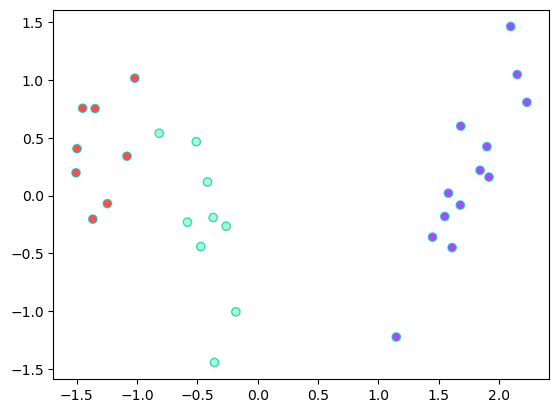

In [10]:
# plot the scatterplot
plt.scatter(
    output[:, 0], output[:, 1],
    c=y_test,
    cmap='rainbow',
    alpha=0.7, edgecolors='c'
)

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])